In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("happiness_score_dataset.csv")


In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Observation - After goig through the description of the dataset  the following things are observed 

1---the deciding factors are 
Economy (GDP per Capita),Family	Health (Life Expectancy),Freedom,Trust (Government Corruption),	Generosity

2--- Dystopia residual is not beconsidered for predicting the happiness score 

3---Happiness score is the  y/target value 


In [4]:
for i in df:
    print(i)

Country
Region
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


In [5]:
df.shape

(158, 12)

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
#creating new dataframe without the unwanted values 
df1=df
droplist=("Country","Region","Happiness Rank","Standard Error","Dystopia Residual")
for i in droplist:
    df1.drop(i,axis=1,inplace=True)

In [9]:
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


Observation - total7 columns - 6 input 1 output

In [10]:
df1.dtypes

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

Observation -  no object type data in the dataframe

In [11]:
df1.shape

(158, 7)

In [12]:
for i in df1:
    print(i)

Happiness Score
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity


Obseervation-df1 has 158 rows and 7 columns 

Obseervation-  target columns (happiness score ) is in the begining of the dataframe 

In [13]:
round(df1.describe(),3)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000,158.000,158.000,158.000,158.000,158.000,158.000
mean,5.376,0.846,0.991,0.630,0.429,0.143,0.237
std,1.145,0.403,0.272,0.247,0.151,0.120,0.127
min,2.839,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.526,0.546,0.857,0.439,0.328,0.062,0.151
50%,5.232,0.910,1.030,0.697,0.436,0.107,0.216
75%,6.244,1.158,1.214,0.811,0.549,0.180,0.310
max,7.587,1.690,1.402,1.025,0.670,0.552,0.796


Observation- All data ranges 0 to 1.7 in general so no so no data normalization will be required as the gaps arenot too high 

### EDA and data cleaning

Happiness Score                     AxesSubplot(0.125,0.125;0.0945122x0.755)
Economy (GDP per Capita)         AxesSubplot(0.238415,0.125;0.0945122x0.755)
Family                           AxesSubplot(0.351829,0.125;0.0945122x0.755)
Health (Life Expectancy)         AxesSubplot(0.465244,0.125;0.0945122x0.755)
Freedom                          AxesSubplot(0.578659,0.125;0.0945122x0.755)
Trust (Government Corruption)    AxesSubplot(0.692073,0.125;0.0945122x0.755)
Generosity                       AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

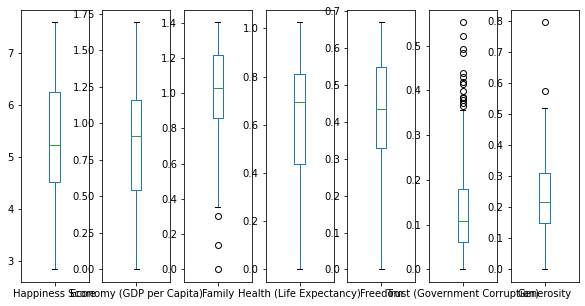

In [14]:
df1.plot(kind="box",subplots=True,figsize=(10,5))

In [15]:
#checking the skewness 
df1.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
dtype: float64

Observation - govt corrupton ,Family and generosity has high skewness which indicates towards presence of  outliers 

<AxesSubplot:>

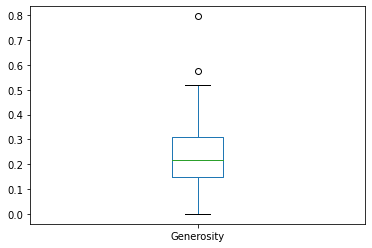

In [16]:
df1["Generosity"].plot.box()

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

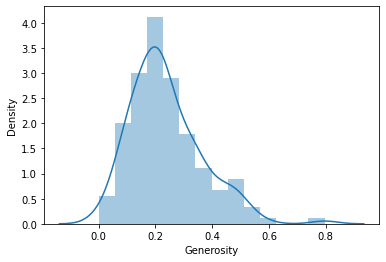

In [17]:

sns.distplot(df1["Generosity"])

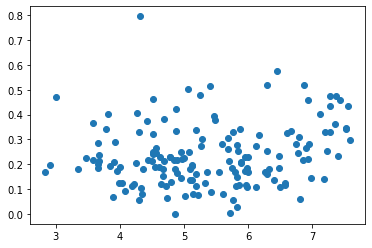

In [18]:
plt.scatter(df1["Happiness Score"],df1["Generosity"])
plt.show()

Observation - generosity has only 2 outliers data is almost normally ditributed 

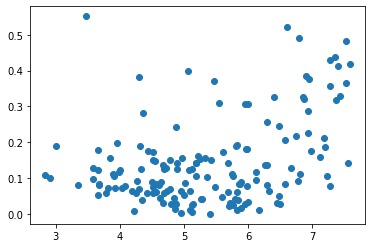

In [19]:
plt.scatter(df1["Happiness Score"],df1["Trust (Government Corruption)"])
plt.show()

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.93736005, 1.36962124, 1.32028142, ..., 1.57743784, 2.30965159,
        0.47103971],
       [1.91458063, 1.13522625, 1.51445776, ..., 1.33245589, 0.01647953,
        1.57585637],
       [1.88479215, 1.19286069, 1.36105403, ..., 1.4696591 , 2.8427738 ,
        0.8242928 ],
       ...,
       [2.0761992 , 0.45524543, 1.90108634, ..., 1.80923785, 0.38141902,
        1.85689094],
       [2.1646885 , 2.06756644, 2.1184666 , ..., 2.06447176, 0.35771452,
        0.31694987],
       [2.22251319, 1.58633379, 3.13472485, ..., 0.42662099, 0.30180313,
        0.5581534 ]])

print(df)
z_scores = stats.zscore(df1) calculate z-scores of "df"
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3). all(axis=1)
new_df = df[filtered_entries]
print(new_df)

In [21]:
df1n=df1[(z<3).all(axis=1)]

In [22]:
df1n

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


In [23]:
df1.shape

(158, 7)

In [24]:
df1n.shape

(153, 7)

In [25]:
round(153/158 , 2)

0.97

Observation- 3% data lost in removing outliers 

In [26]:
df1n.skew()

Happiness Score                  0.133600
Economy (GDP per Capita)        -0.392269
Family                          -0.803145
Health (Life Expectancy)        -0.741582
Freedom                         -0.397454
Trust (Government Corruption)    1.280533
Generosity                       0.636850
dtype: float64

Happiness Score                     AxesSubplot(0.125,0.125;0.0945122x0.755)
Economy (GDP per Capita)         AxesSubplot(0.238415,0.125;0.0945122x0.755)
Family                           AxesSubplot(0.351829,0.125;0.0945122x0.755)
Health (Life Expectancy)         AxesSubplot(0.465244,0.125;0.0945122x0.755)
Freedom                          AxesSubplot(0.578659,0.125;0.0945122x0.755)
Trust (Government Corruption)    AxesSubplot(0.692073,0.125;0.0945122x0.755)
Generosity                       AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

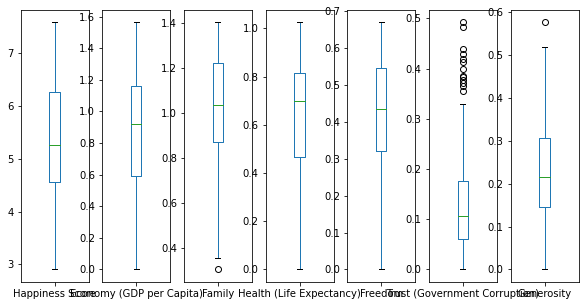

In [27]:
df1n.plot(kind="box",subplots=True,figsize=(10,5))

<AxesSubplot:>

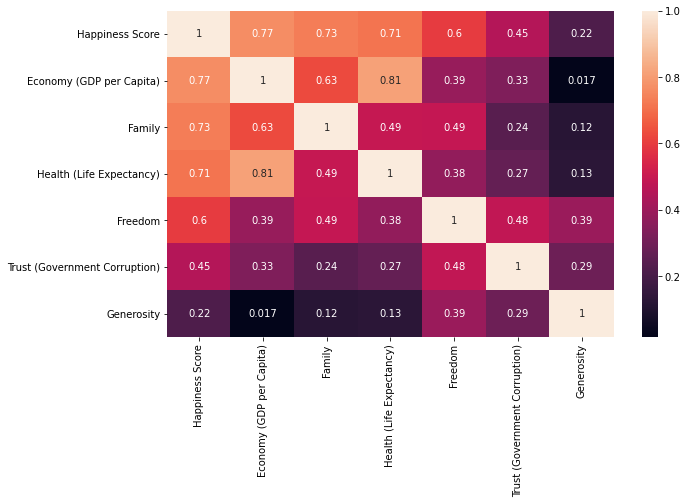

In [28]:
#checking for multicolinearity 
cor=df1n.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

observation- no multi colenearity found in the dataset

# train test 

In [29]:
x=df1n.drop("Happiness Score",axis=1)
y=df1n["Happiness Score"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [31]:
x_train.shape

(102, 6)

In [32]:
x_test.shape

(51, 6)

In [33]:
y_train.shape

(102,)

In [34]:
for i in range (200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    print(sco*100,"random state",i)

78.07977215731637 random state 0
77.65203691658564 random state 1
77.81183152149165 random state 2
77.75890805175838 random state 3
74.57084216836178 random state 4
77.73637571691624 random state 5
77.48686476989747 random state 6
80.18054854651292 random state 7
79.22960165141276 random state 8
79.60668491122149 random state 9
80.95485436386163 random state 10
73.69366522725014 random state 11
78.41946561223358 random state 12
76.5909876335982 random state 13
76.2665868256855 random state 14
74.0192842685708 random state 15
79.9233898443037 random state 16
76.78173651791963 random state 17
76.24262045758776 random state 18
74.76024468018406 random state 19
76.17173871204648 random state 20
77.39449499462941 random state 21
77.22573710336523 random state 22
76.04050981230634 random state 23
78.68812391538421 random state 24
78.06357711882886 random state 25
77.79489781613964 random state 26
80.3966269133647 random state 27
79.55825775004384 random state 28
76.17531634807311 random stat

In [35]:
#saving best random state 
maxscor=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor, "with random state ",maxRS)

best accuracy  is  0.8448019332613121 with random state  112


In [36]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=112)

In [38]:
#linear regression 
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm.score(x_train,y_train)

0.8448019332613121

In [39]:
#Lasso 
ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
ls.score(x_train,y_train)

0.844801933119403

In [40]:
#Ridge 
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)

0.8448019332612845

In [41]:
#elastic net
en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred=en.predict(x_test)
en.score(x_train,y_train)

0.8448019330495108

In [42]:
#observation - linear regression is gving  the highest score 

# Cross validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
models=(lm,ls,rd,en)
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean())

LinearRegression() -6.043406038407562
Lasso(alpha=1e-06) -6.043487396136588
Ridge(alpha=1e-06) -6.043405976254717
ElasticNet(alpha=1e-06) -6.043443422032101


Observation -ridge shows mimimum  negative score

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters={"solver":["auto","svd","sparse_cg","saga"],
             "alpha":np.arange(1.1,30.1),
           "max_iter":np.arange(1,5)}

In [47]:
GCV=GridSearchCV(Ridge(),parameters,cv=5)

In [48]:
rd.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [49]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 1.1,  2.1,  3.1,  4.1,  5.1,  6.1,  7.1,  8.1,  9.1, 10.1, 11.1,
       12.1, 13.1, 14.1, 15.1, 16.1, 17.1, 18.1, 19.1, 20.1, 21.1, 22.1,
       23.1, 24.1, 25.1, 26.1, 27.1, 28.1, 29.1]),
                         'max_iter': array([1, 2, 3, 4]),
                         'solver': ['auto', 'svd', 'sparse_cg', 'saga']})

In [50]:
GCV.best_params_

{'alpha': 1.1, 'max_iter': 3, 'solver': 'saga'}

In [51]:
### final model selection 

In [52]:
fin_mod=Ridge(alpha= 1.1, max_iter= 3, solver= 'saga')
fin_mod.fit(x_train ,y_train)
pred=fin_mod.predict(x_test)
scoree=fin_mod.score(x_train,y_train)
print(scoree)

0.8340305173970951


# Saving model 

In [53]:
import joblib
joblib.dump(fin_mod,"happiness.pkl")

['happiness.pkl']